In [3]:
import pandas as pd

金融数据的读取与显示

In [5]:
# 标准题目代码，在最后要写上if__name__ = '__main__': run def
def test_run():
    df = pd.read_csv('data.csv')
    print (df.head()) # 只看前几行,来大致了解数据，默认5行，也就是0-4；  df.tail()则是最后5行
    print (df[10:21]) # 显示10-20行的数据
    
if __name__ == '__main__':
    test_run()

         Date       Open       High        Low      Close  Adj Close   Volume
0  2017-07-17  31.790001  32.049999  31.639999  32.009998  31.615602  3126600
1  2017-07-18  31.980000  32.259998  31.830000  32.060001  31.664989  2248700
2  2017-07-19  32.049999  32.340000  31.920000  32.160000  31.763756  2493600
3  2017-07-20  32.209999  32.259998  31.740000  31.740000  31.348932  3643100
4  2017-07-21  31.719999  31.740000  31.420000  31.590000  31.200779  3304000
          Date       Open       High        Low      Close  Adj Close   Volume
10  2017-07-31  31.840000  32.049999  31.520000  31.650000  31.260040  9972100
11  2017-08-01  31.760000  31.799999  29.990000  30.250000  29.877291  6385800
12  2017-08-02  30.129999  30.250000  29.719999  30.030001  29.660002  5740600
13  2017-08-03  29.580000  30.070000  29.450001  30.030001  30.030001  2967200
14  2017-08-04  29.910000  30.000000  29.620001  29.850000  29.850000  2142900
15  2017-08-07  29.820000  29.900000  29.430000  29.559999

某个股票单项查询

In [7]:
def get_max_close(symbol):
    df = pd.read_csv('data/{}.csv'.format(symbol)) #正则式，将文件的读取设为变量,无示例文件所以报错。
    return df['Close'].max() #df[‘确认加引号’]

def test_run():
    for symbol in ['AAPL', 'IBM']:
        print ('max close')
        print (symbol, get_max_close(symbol))

if __name__ = '__main__':
    test_run()
# 结果为显示aapl和ibm的max close

SyntaxError: invalid syntax (<ipython-input-7-cdfdee0c7cfc>, line 10)

金融时间序列数据作图

In [8]:
import matplotlib.pyplot as plt

0     31.615602
1     31.664989
2     31.763756
3     31.348932
4     31.200779
5     30.953859
6     31.309425
7     31.595852
8     31.516836
9     31.437822
10    31.260040
11    29.877291
12    29.660002
13    30.030001
14    29.850000
15    29.559999
16    29.610001
17    29.379999
18    29.190001
19    29.270000
20    29.799999
Name: Adj Close, dtype: float64


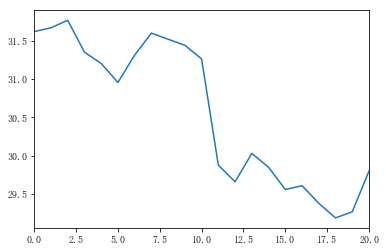

In [10]:
def test_run():
    df = pd.read_csv('data.csv')
    print (df['Adj Close'])
    df['Adj Close'].plot()
    plt.show()

test_run()

以上得到了没有x、y轴标签，没有title，且时间序列相反的图

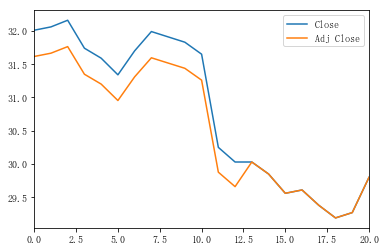

In [12]:
def test_run():
    df = pd.read_csv('data.csv')
    df[['Close', 'Adj Close']].plot() # 同时显示两列数据，只需要双方括号即可,单括号报错
    plt.show()
    
test_run()

下面要解决如何：
通过时间数据索引
将多个股票合在同一个df中
将数据按时间排列，不窜行
时间序列反转

创建只有时间的df

In [24]:
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)
df1 = pd.DataFrame(index = dates)

df1
print(df1)

Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]


join stock data

In [ ]:
dfSPY = pd.read_csv('data/SPY.csv', index_col = 'Date', 
                    usecols = ['Date', 'Adj Close'],# 只挑选有用的两列，下面是将NaN修改为字符串显示
                    na_values = ['nan'], parse_dates = True) #dfSPY原始股票数据有数字索引，与df1索引不同
df1 = df1.join(dfSPY)#默认向左合并，只有在左边有的索引值，右边也有的情况下合并，右边没有就显示NaN先考虑左边。
df1 = df1.dropna() #删除所有值为NaN的行
#以上两行也可以用一行完成，如下,即交集
df1.join(dfSPY, how = 'inner')
print df1

加入更多的股票数据

In [ ]:
symbols = ['GOOG', 'IBM', 'GLD']#股票列表
for symbol in symbols:
    de_temp = pd.read_csv('data/{}.csv'.format(symbol), index_col = 'Date', parse_dates=True
                         , usecols = ['Date', 'Adj Close'], na_values = ['nan'])
    #这里相对于添加单一股票，需要额外输入一行代码，如下
    df_temp = df_temp.rename(columns = {'Adj Close': symbol}) # for循环的缘故，如果不加入这行代码会导致多列名均为Adj Close，从而报错，这样可以修改列名为各股票名字
    df = df1.join(df_temp)

同时约束行与列的df数据提取

In [ ]:
df[行：行, [‘列’,‘列’]]
df.ix['2010-01-01':'2010-01-31'] #所需行全部列提取，去掉ix也可以，但加上更加pythonic
df[['列', '列']] #双方括号

In [ ]:
df = df / df[0] # 可以将不同股票数据除以第一天数值，归一化，归到从1开始，来比较波动性

plot标签等

In [25]:
ax = df.plot(title = 'title', fontsize = 2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

NameError: name 'df' is not defined